In [9]:
from requests import get
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['axes.linewidth'] = 0.8
plt.style.use('seaborn-deep')
print(plt.style.available)
metric = 'cov'
cutoff = 10
n_questions = 10
de_only = True
experiment_subset = 'equal'


data = get(f'https://mindreader.tech/spectate/results/{experiment_subset}/{metric}/{cutoff}').json()
data = {k: v for k, v in data.items() if not 'grid' in k}
print(data)

metric = metric.replace('cov', 'div')  # Hack job :-)
interviewer_kinds = ['greedy-adaptive-', 'greedy-', 'pop-'] #, 'dqn-', 'ddpg-']

def replace_all(string, lst):
    for item in lst:
        string = string.replace(item, '')
    
    return string

unique_models = set([replace_all(model, interviewer_kinds) for model in data.keys()])
if de_only:
    unique_models = set([model.replace('-rec', '') for model in unique_models])
else:
    unique_models = set([model for model in unique_models if model.endswith('-rec')])

print(unique_models)
unique_models = sorted(set([model for model in unique_models if all([f'{interviewer}{model}' in data and len(data[f'{interviewer}{model}']) >= n_questions for interviewer in interviewer_kinds])]))
print(unique_models)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
{'dqn-knn': [[0.17461622807017543, 0.13157894736842105, 0.13925438596491227, 0.14364035087719298], [0.17461622807017543, 0.12966008771929824, 0.18640350877192982, 0.1913377192982456], [0.19078947368421054, 0.13349780701754385, 0.16447368421052633, 0.17516447368421054], [0.18448464912280702, 0.12472587719298246, 0.17489035087719298, 0.21025219298245615], [0.20148026315789475, 0.12719298245614036, 0.1737938596491228, 0.17242324561403508], [0.19791666666666666, 0.12335526315789473, 0.17489035087719298, 0.15487938596491227], [0.19380482456140352, 0.1208881

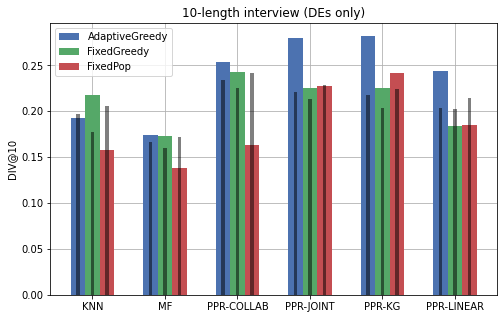

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
ind = np.arange(len(unique_models))
width = .2

model_map = {'ppr-linear-learned': 'ppr-linear'}
label_map = {'greedy-adaptive-': 'AdaptiveGreedy', 'greedy-': 'FixedGreedy', 'pop-': 'FixedPop', 'dqn-': 'DQN', 'ddpg-': 'DDPG'}
for idx, kind in enumerate(interviewer_kinds):
    x = unique_models
    print()
    y = [np.mean(data[f'{kind}{model}'][n_questions - 1]) for model in x]
    y_std = [np.std(data[f'{kind}{model}'][n_questions - 1]) for model in x]
    
    y_rec = [np.mean(data[f'{kind}{model}-rec'][n_questions - 1]) for model in x]
    y_rec_std = [np.std(data[f'{kind}{model}-rec'][n_questions - 1]) for model in x]

    ax.bar(ind + idx * width, y, width=width, label=label_map.get(kind), color=f'C{idx}', zorder=3)
    ax.bar(ind + idx * width, y_rec, alpha=0.5, width=width * 0.25, zorder=3, color=f'black', edgecolor='white', linewidth=0)
    
model_displays = [model.replace('-rec', '') for model in unique_models]
model_displays = map(lambda model: model_map.get(model, model).upper(), model_displays)

ax.set_xticks(ind + width)
ax.set_xticklabels(model_displays)
plt.ylabel(f'{metric.upper()}@{cutoff}')
interview_kind = 'DE' if de_only else 'RE'
plt.title(f'{n_questions}-length interview ({interview_kind}s only)')
plt.legend(loc='upper left')
plt.grid(True, zorder=0)
plt.savefig(f'output/{experiment_subset}_{interview_kind.lower()}_{metric}{cutoff}_interviewer_comparison.pdf', bbox_inches='tight')
plt.show()